# **Clip Demo**
---
Clip enables zero-shot image classification
The foolowing is the default demo of the model classifying an image into: "a photo of a cat" or "a photo of a dog"


In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [2]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities


In [4]:
cat_prob = probs[0][0].item()  # Probability for "a photo of a cat"
dog_prob = probs[0][1].item()  # Probability for "a photo of a dog"

if cat_prob > dog_prob:
    print("The image is more likely to contain a cat.")
else:
    print("The image is more likely to contain a dog.")

The image is more likely to contain a cat.


---
## Testing this zero-shot method for agricultural purposes
Checking if it can recognise the type of disease on its own 

In [11]:
import os
import base64
import matplotlib.pyplot as plt

def file_to_data_url(file_path: str):
    """
    Convert a local image file to a data URL.
    """
    with open(file_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

    _, extension = os.path.splitext(file_path)
    mime_type = f'image/{extension[1:].lower()}'

    return f'data:{mime_type};base64,{encoded_string}'

In [20]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is 1227-A606

 Directory of c:\Users\gfrag\Desktop\Multimodal_Testing\Scripts

29/01/2025  05:35 ��    <DIR>          .
01/02/2025  02:59 ��    <DIR>          ..
01/02/2025  03:28 ��           381.292 Clip_Test.ipynb
29/01/2025  05:36 ��           719.697 LlamaVision.ipynb
29/01/2025  02:54 ��    <DIR>          Pixtral
29/01/2025  04:04 ��         1.047.712 Qwen.ipynb
               3 File(s)      2.148.701 bytes
               3 Dir(s)  33.750.786.048 bytes free


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

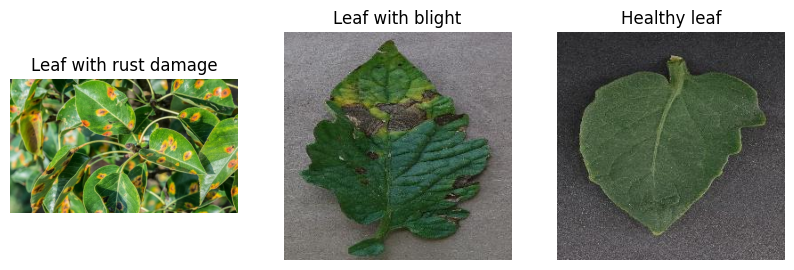

In [23]:
healthy_leaf = r"leaves\healthy.png"
rust_leaf_image_path = r"leaves\rust.jpg"
blight_leaf_image_path = r"leaves\blight.png"
# Load image of pear tree
healthy_leaf_image = Image.open(healthy_leaf)
rust_leaf_image = Image.open(rust_leaf_image_path)
blight_leaf_image = Image.open(blight_leaf_image_path)
# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(rust_leaf_image)
plt.title("Leaf with rust damage")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(blight_leaf_image)
plt.title("Leaf with blight")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(healthy_leaf_image)
plt.title("Healthy leaf")
plt.axis("off")

+ Testing for rust:

In [24]:
inputs = processor(text=["a photo of leaves with rust damage", "a photo of leaves with Blight", "a photo of healthy leaves "], images=rust_leaf_image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

rust_prob = probs[0][0].item()  # Probability for "a photo of leaves with rust damage"
Blight_prob = probs[0][1].item()  # Probability for "a photo of leaves with Blight"
healthy_prob = probs[0][2].item()  # Probability for "a photo of healthy leaves "

if rust_prob >= Blight_prob and rust_prob >= healthy_prob:
    print("Rust damage most likely")
elif Blight_prob >= rust_prob and Blight_prob >= healthy_prob:
    print("Blight most likely")
else:
    print("Healthy leaves most likely")



Rust damage most likely


+ Testing for blight 

In [25]:
image2_path = "images/diseaseLeaf.png"
image2 = Image.open(blight_leaf_image_path)
inputs = processor(text=["a photo of leaves with rust damage", "a photo of leaves with Blight", "a photo of healthy leaves "], images=image2, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

rust_prob = probs[0][0].item()  # Probability for "a photo of leaves with rust damage"
Blight_prob = probs[0][1].item()  # Probability for "a photo of leaves with Blight"
healthy_prob = probs[0][2].item()  # Probability for "a photo of healthy leaves "

if rust_prob >= Blight_prob and rust_prob >= healthy_prob:
    print("Rust damage most likely")
elif Blight_prob >= rust_prob and Blight_prob >= healthy_prob:
    print("Blight most likely")
else:
    print("Healthy leaves most likely")


Blight most likely


+ Testing for healthy leaf 

In [26]:
inputs = processor(text=["a photo of leaves with rust damage", "a photo of leaves with Blight", "a photo of healthy leaves "], images=healthy_leaf_image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

rust_prob = probs[0][0].item()  # Probability for "a photo of leaves with rust damage"
Blight_prob = probs[0][1].item()  # Probability for "a photo of leaves with Blight"
healthy_prob = probs[0][2].item()  # Probability for "a photo of healthy leaves "

if rust_prob >= Blight_prob and rust_prob >= healthy_prob:
    print("Rust damage most likely")
elif Blight_prob >= rust_prob and Blight_prob >= healthy_prob:
    print("Blight most likely")
else:
    print("Healthy leaves most likely")

Healthy leaves most likely


By comparing the 3 cases (blight, rust and healthy) we see that while it can notice the difference between a healthy leaf and one with disease -> it cannot **always** classify the disease type correctly (surprisingly good though/ better than vision llms)